In [1]:
##### Imports and useful variables 

# imports
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np 

# variables 
path_fig = 'D:\IfA REU\IfA-REU-Project\Figures'

# Get COSMOS 2020 Data

In [2]:
##### Get data from catalog file

# open COSMOS master file and get data 
inf = fits.open('D:\IfA REU\Catalogs\COSMOS2020_CLASSIC_R1_v2.0_master.fits')
data = inf[1].data
cols = inf[1].columns
head = inf[0].header
inf.close()

# NOTE: Only run this once! It gets stuck if you try to run this again. 
#       If it gets stuck, interrupt and restart the jupyter kernel then run again. 

In [3]:
##### List important columns 

# IRAC Columns (unit = 'uJy')
ch1 = 'SPLASH_CH1_FLUX' # 3.5686 um
ch2 = 'SPLASH_CH2_FLUX' # 4.5067 um
ch3 = 'SPLASH_CH3_FLUX' # 5.7788 um
ch4 = 'SPLASH_CH4_FLUX' # 7.9958 um 

# identifier 
id  = 'ID'

# redshift
z = 'lp_zBEST'

In [4]:
##### Get data from columns and print info 

# get IRAC data
ch1_data = np.array(data[ch1])
ch2_data = np.array(data[ch2])
ch3_data = np.array(data[ch3])
ch4_data = np.array(data[ch4])
# get ids
ids_data = np.array(data[id])
# get redshift 
z_data   = np.array(data[z])

# print info
print('Col \t Min \t\t Max \t\t Count')
print('----------------------------------------------------')
print('CH1 \t', min(ch1_data), '\t',   max(ch1_data), '\t',    len(ch1_data))
print('CH2 \t', min(ch2_data), '\t',   max(ch2_data), '\t',    len(ch2_data))
print('CH3 \t', min(ch3_data), '\t\t', max(ch3_data), '\t',    len(ch3_data))
print('CH4 \t', min(ch4_data), '\t\t', max(ch4_data), '\t',    len(ch4_data))
print('ID  \t', min(ids_data), '\t\t', max(ids_data), '\t',    len(ids_data))
print('z  \t',  min(z_data),   '\t\t', max(z_data),   '\t\t',  len(z_data))

Col 	 Min 		 Max 		 Count
----------------------------------------------------
CH1 	 -373.86588 	 11499.407 	 1720700
CH2 	 -200.00957 	 12870.739 	 1720700
CH3 	 -99.9 		 17447.684 	 1720700
CH4 	 -99.9 		 15091.21 	 1720700
ID  	 1 		 1720700 	 1720700
z  	 -99.0 		 99.9 		 1720700


In [5]:
##### Filter out bad data from the columns and print info 

# boolean array, true when data is valid and false otherwise
irac_good = (ch1_data > 0) & (ch2_data > 0) & (ch3_data > 0) & (ch4_data > 0)
z_good    = (z_data != -99) & (z_data != 99.9)

# final selection 
all_good  = irac_good & z_good

# filter data
ch1_data_good = ch1_data[all_good]
ch2_data_good = ch2_data[all_good]
ch3_data_good = ch3_data[all_good]
ch4_data_good = ch4_data[all_good]
ids_data_good = ids_data[all_good]
z_data_good   = z_data[all_good]

# print info
print('Col \t Min \t\t Max \t\t Count')
print('----------------------------------------------------')
print('CH1 \t', min(ch1_data_good), '\t',   max(ch1_data_good), '\t', len(ch1_data_good))
print('CH2 \t', min(ch2_data_good), '\t',   max(ch2_data_good), '\t', len(ch2_data_good))
print('CH3 \t', min(ch3_data_good), '\t',   max(ch3_data_good), '\t', len(ch3_data_good))
print('CH4 \t', min(ch4_data_good), '\t',   max(ch4_data_good), '\t', len(ch4_data_good))
print('ID  \t', min(ids_data_good), '\t',   max(ids_data_good), '\t', len(ids_data_good))
print('z   \t', min(z_data_good),   '\t\t', max(z_data_good),   '\t', len(z_data_good))

Col 	 Min 		 Max 		 Count
----------------------------------------------------
CH1 	 0.023648646 	 1287.5731 	 50500
CH2 	 0.0023715238 	 1051.9921 	 50500
CH3 	 0.002538407 	 2789.9287 	 50500
CH4 	 0.00084613566 	 5239.906 	 50500
ID  	 202353 	 1469985 	 50500
z   	 0.0 		 6.5032 	 50500


# IR AGN Selection (Donley et al., 2012) 

x = log10 ( f5.8 μm / f3.6 μm ), 
y = log10 ( f8.0 μm / f4.5 μm ) 

x >= 0.08 AND 
y >= 0.15 AND
y >= (1.21 x) − 0.27 AND
y <= (1.21 x) + 0.27 AND
f4.5 μm > f3.6 μm AND
f5.8 μm > f4.5 μm AND
f8.0 μm > f5.8 μm

In [6]:
##### Draw the selection wedge for Donley 2012 on a plot 

def PlotDonleyWedge() : 
    # constants
    x_min = 0.08    # x >= 0.08
    y_min = 0.15    # y >= 0.15
    max = 10        # arbritrary 

    # calculate intercepts
    x_int_ymin = (y_min + 0.27)/1.21  # intercept between y_min and (y>=1.21x-0.27)
    y_int_xmin = (1.21*x_min) + 0.27  # intercept between x_min and (y>=1.21x+0.27)

    # calculate y_low intercepts (y>=1.21x-0.27)
    y1_low = (1.21*x_int_ymin)  - 0.27   
    y2_low = (1.21*max)         - 0.27

    # calculate y_high intercepts (y>=1.21x+0.27)
    y1_high = (1.21*x_min)      + 0.27
    y2_high = (1.21*max)        + 0.27

    # plot lines between intercepts 
    plt.plot( [x_min,       x_min],         [y_min,     y_int_xmin], 'k' )    # x >= 0.08
    plt.plot( [x_min,       x_int_ymin],    [y_min,     y_min],      'k' )    # y >= 0.15
    plt.plot( [x_int_ymin,  max],           [y1_low,    y2_low],     'k' )    # y >= 1.21x - 0.27
    plt.plot( [x_min,       max],           [y1_high,   y2_high],    'k' )    # y <= 1.21x + 0.27

    # name the x and y axis 
    plt.xlabel('$\log(f_{5.8um}/f_{3.6um})$') 
    plt.ylabel('$\log(f_{8.0um}/f_{4.5um})$') 

In [13]:
##### redifine the defaults for plots

def FormatPlot() :
    mpl.rcParams['figure.figsize'] = 6, 4   # figure size in inches
    mpl.rcParams['axes.titlesize'] = 16     # size of title
    mpl.rcParams['axes.titlepad'] = 16      # space between title and plot 
    mpl.rcParams['axes.labelsize'] = 14     # font size of the x and y labels
    mpl.rcParams['lines.linewidth'] = 0.5   # line width in points


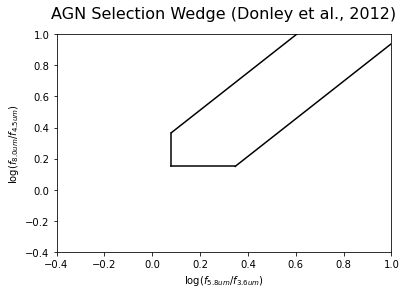

In [8]:
##### draw the Donley Wedge on a plot as a test 

# plot 
PlotDonleyWedge()
FormatPlot()
plt.axis([-0.4,1,-0.4,1]) 
plt.title('AGN Selection Wedge (Donley et al., 2012)') 
plt.show()

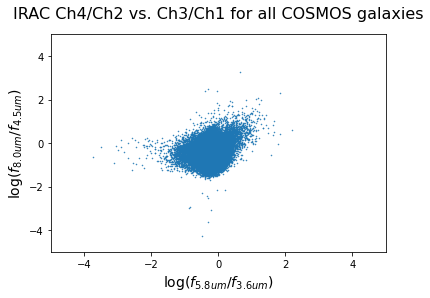

Galaxy count:  50500


In [9]:
##### plot all the galaxies with IRAC data

# calculate colors for each galaxy
x = np.log10( ch3_data_good / ch1_data_good ) # x = log10 ( f_5.6um / f_3.6um )
y = np.log10( ch4_data_good / ch2_data_good ) # y = log10 ( f_8.0um / f_4.5 um )

# plot 
plt.plot(x, y, 'o', markersize=0.5)
plt.axis([-5,5,-5,5]) 
plt.title('IRAC Ch4/Ch2 vs. Ch3/Ch1 for all COSMOS galaxies') 
plt.xlabel(r'$\log(f_{5.8um}/f_{3.6um})$') 
plt.ylabel(r'$\log(f_{8.0um}/f_{4.5um})$')
plt.show()

# print number of galaxies
print('Galaxy count: ', len(x))

In [14]:
##### Get the galaxies within the Donley selection wedge

# initialize empty lists
x_agn   = []
y_agn   = []
z_agn   = []
id_agn  = []

# look through each galaxy and check if it is inside the selection box
for i in range(len(x)):
    # if the point is an agn...
    if(x[i]>=0.08 and y[i]>=0.15 and y[i]>=(1.21*x[i]-0.27) and y[i]<=(1.21*x[i]+0.27)) :  
        # ... add values to respective list 
        x_agn.append(x[i])
        y_agn.append(y[i])
        z_agn.append(z_data_good[i])
        id_agn.append(ids_data_good[i])
    # else, move to next point

# convert lists to arrays as needed
z_agn_arr = np.array(z_agn)


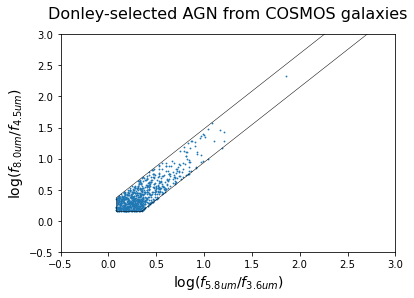

Galaxy count:  799


In [11]:
##### Plot Donley selected AGN in the wedge 

# plot agn in selection box 
plt.plot(x_agn, y_agn, 'o', markersize=0.8)
PlotDonleyWedge()
plt.axis([-0.5,3,-0.5,3]) 
plt.title('Donley-selected AGN from COSMOS galaxies') 
plt.savefig(path_fig+'\DonleySelectedAGN.png',bbox_inches ="tight",pad_inches=0.2,facecolor='w',edgecolor='w')
plt.show()

# print number of galaxies
print('Galaxy count: ', len(x_agn))

# Properties of IR AGN Selection

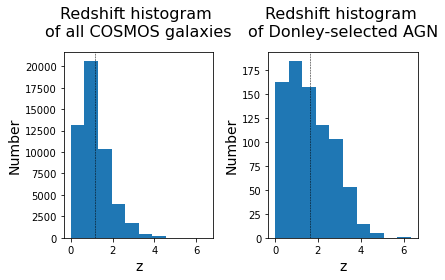

In [16]:
##### Plot the histograms of the redshifts of the Donley selected AGN 

# subplots 
fig, (z_hist, z_hist_agn) = plt.subplots(1,2)

# plot all redshift histogram
z_hist.hist(z_data_good)
z_hist.axvline(z_data_good.mean(), color='k',linestyle='dashed') # average line 
z_hist.set_title('Redshift histogram \nof all COSMOS galaxies')
z_hist.set_xlabel('z')
z_hist.set_ylabel('Number')

# plot agn redshift histogram
z_hist_agn.hist(z_agn_arr)
z_hist_agn.axvline(z_agn_arr.mean(), color='k',linestyle='dashed') # average line 
z_hist_agn.set_title('Redshift histogram \nof Donley-selected AGN')
z_hist_agn.set_xlabel('z')
z_hist_agn.set_ylabel('Number')

# formatting 
plt.tight_layout()

# save
plt.savefig(path_fig+'\RedshiftHistogram.png',bbox_inches ="tight",pad_inches=0.2,facecolor='w',edgecolor='w')


# Next Steps
1. explore parameters of ir selected (redshifts distribution histogram (col=lp_zBEST)) (SED properties/luminositied later) --> do this before meeting w/ Dave tomorrow
2. given x-ray catalog from paper --> Marchesi/Chandra catalog 2016 --> fits table 
3. match x-ray sources from Marchei to COSMOS 2020 catalog using ID 
4. plot x-ray and ir on same plot
5. Later: Get Lx_* flux columns from Xray selecgted AGN distributions


* start taking ntoes for paper, get started by end of week
